### <span style="color: blue;">**Covid-19 in India**</span>

##### <span style="color: green;">**History**</span>

The COVID-19 pandemic in India is part of the worldwide pandemic of coronavirus disease
2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).
The first case of COVID-19 in India, which originated from China, was reported on 30 January

2020. India currently has the largest number of confirmed cases in Asia, and has the second-
highest number of confirmed cases in the world after the United States, with the number of

total confirmed cases breaching the 100,000 mark on 19 May, and 1,000,000 confirmed

cases on 17 July 2020. On 29 August 2020, India recorded the global highest spike in COVID-
19 cases on a day with 78,761 cases surpassing the previous global highest daily spike of

77,368 cases which was recorded in the US on 17 July 2020.
India's case fatality rate is among the lowest in the world at 2.41% as of 23 July and is
steadily declining. By mid-May 2020, six cities accounted for around half of all reported
cases in the country – Mumbai, Delhi, Ahmedabad, Chennai, Pune and Kolkata. As of 24 May
2020, Lakshadweep is the only region which has not reported a case. On 10 June, India's
recoveries exceeded active cases for the first time.
On 22 March, India observed a 14-hour voluntary public curfew at the instance of Prime
Minister Narendra Modi. It was followed by mandatory lockdowns in COVID-19 hotspots and
all major cities. Further, on 24 March, the prime minister ordered a nationwide lockdown for
21 days, affecting the entire 1.3 billion-person population of India. On 14 April, India
extended the nationwide lockdown till 3 May which was followed by two-week extensions
starting 3 and 17 May with substantial relaxations. From 1 June, the government started
"unlocking" the country (barring "containment zones") in three unlock phases.

#### <span style="color: green;">**Problem statement**</span>

- <span style="color: red;">The objective of the first part of the problem statement is to predict the Covid Cases of a City on 1st September 2020. The output file  should contain only City and the respective Covid Cases for the test data.</span>

### <span style="color: blue;">Table of Content</span>

1.   Importing Dataset
2.   EDA

3.   Model
     1. Xg Boost
      
4.. Metrics

#### <span style="color: blue;"> **Importing DataSet** </span>


1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 


In [2]:
# load the data
df = pd.read_excel('Train_dataset.xlsx')

In [3]:
df.head()  # Head of the data

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [4]:
df.info()  # Information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
City                 787 non-null object
State                787 non-null object
Type                 787 non-null object
Population [2011]    739 non-null float64
Popuation [2001]     295 non-null float64
Sex Ratio            777 non-null float64
Median Age           769 non-null float64
Avg Temp             770 non-null float64
SWM                  783 non-null object
Toilets Avl          761 non-null float64
Water Purity         629 non-null float64
H Index              647 non-null float64
Female Population    646 non-null float64
# of hospitals       772 non-null float64
Foreign Visitors     697 non-null float64
Covid Cases          787 non-null int64
dtypes: float64(11), int64(1), object(4)
memory usage: 98.5+ KB


In [5]:
df.describe(include='all')

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,787,787,787,7.390000e+02,2.950000e+02,777.000000,769.000000,770.000000,783,761.000000,629.000000,647.000000,6.460000e+02,772.000000,6.970000e+02,787.00000
unique,772,33,37,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aurangabad,Andhra Pradesh,C-1T,NaN,NaN,NaN,NaN,NaN,HIGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,78,269,NaN,NaN,NaN,NaN,NaN,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.102834e+05,5.320451e+05,905.712999,26.183355,30.941558,NaN,96.086728,150.373609,0.497069,2.910011e+05,41.849741,1.457945e+06,6615.64676
std,NaN,NaN,NaN,8.874849e+05,1.067831e+06,37.018542,2.113063,6.968289,NaN,30.532991,29.063767,0.293421,8.354348e+05,29.086939,1.664151e+06,15108.10276
min,NaN,NaN,NaN,3.677600e+04,2.935400e+04,818.000000,23.000000,5.000000,NaN,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.00000
25%,NaN,NaN,NaN,5.255000e+04,1.694320e+05,877.000000,24.000000,28.000000,NaN,70.000000,125.000000,0.238586,4.514450e+04,18.000000,2.378540e+05,2270.00000
50%,NaN,NaN,NaN,7.910600e+04,2.366000e+05,906.000000,26.000000,31.000000,NaN,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05,2582.00000
75%,NaN,NaN,NaN,2.374765e+05,4.745850e+05,928.000000,28.000000,36.000000,NaN,119.000000,176.000000,0.752517,2.206772e+05,67.000000,3.104060e+06,8761.00000


- Note :- There are nan Values there in data

In [6]:
df.isnull().sum() # Check for the number of null values

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

Note:- With High null values in the columns drop those coloumns

In [8]:
columns= [ 'Popuation [2001]', 'Water Purity' ,'H Index', 'Female Population']
df.drop(columns , axis=1, inplace=True)  # Drop of the coloums
df.isnull().sum() # Checkinh for the null values

City                  0
State                 0
Type                  0
Population [2011]    48
Sex Ratio            10
Median Age           18
Avg Temp             17
SWM                   4
Toilets Avl          26
# of hospitals       15
Foreign Visitors     90
Covid Cases           0
dtype: int64

In [9]:
df.dropna(subset=['Population [2011]'],inplace=True)  # Drop the Nan values in populaTION Coloumn
df.isnull().sum()

City                  0
State                 0
Type                  0
Population [2011]     0
Sex Ratio            10
Median Age           18
Avg Temp             17
SWM                   4
Toilets Avl          21
# of hospitals       15
Foreign Visitors     90
Covid Cases           0
dtype: int64

- <span style="color: brown;"> Note- After droping the Nan values in the populatio coloumn . There are moere nan values in there other columns. We need to replace all those Nan Values </span>

In [10]:
df.shape  # Shape of the data set

(739, 12)

In [11]:
df['Type'].unique()  # Checking for unique values of Type colounm

array(['M.C', 'MPUA', 'T', 'M', 'M.Cl', 'C-1T', 'M.Corp', 'N.P', 'UA',
       'M.B.', 'N.Pd', 'M.Cl.', 'M.B', 'N.P.P', 'C.T', 'CMC', 'C.M.C',
       'N.P.', 'Nagar Parishad', 'N.A.C', 'MB', 'M Cl', 'M.Corp.', 'U.A',
       'N.P.P.', 'T.C', 'T.M.C', 'N.T', 'C.B', 'NPP', 'T.M.C.', 'NP',
       'Np', 'C.T.', 'T.P', 'N.A', 'T.P.'], dtype=object)

-<span style="color: red;">Note:- Here we can observe that some type like N.P.P. , NPP are same like N.P.P. So we need to replace alose dummy variables</span>

In [12]:
dic ={'C.T.':'C.T','CMC':'C.M.C',
      'M.Cl.':'M.Cl','M Cl':'M.Cl',
      'M.B.':'M.B','MB':'M.B',
      'M.Corp.':'M.Corp',
      'N.P.':'N.P','NP':'N.P', 
      'N.P.P.': 'N.P.P', 'NPP':'N.P.P',
      'UA' :'U.A','T.M.C.':'T.M.C','T.P.':'T.P'}


df['Type'] =  df['Type'].replace(dic) # Replace all the those have dummy variables
df['Type'].unique()  # Checking for unique values

array(['M.C', 'MPUA', 'T', 'M', 'M.Cl', 'C-1T', 'M.Corp', 'N.P', 'U.A',
       'M.B', 'N.Pd', 'N.P.P', 'C.T', 'C.M.C', 'Nagar Parishad', 'N.A.C',
       'T.C', 'T.M.C', 'N.T', 'C.B', 'Np', 'T.P', 'N.A'], dtype=object)

In [13]:
df['State'].unique()  # Checking for unique values for state coloumn

array(['Maharashtra', 'Delhi', 'Karnataka', 'Telangana', 'Gujarat',
       'Tamil Nadu', 'Tamil nadu', 'West Bengal', 'Rajasthan',
       'Uttar Pradesh', 'Madhya Pradesh', 'Andhra Pradesh', 'Bihar',
       'Punjab', 'Jharkhand', 'Haryana', 'Jammu and Kashmir',
       'Chandigarh', 'Odisha', 'Chhattisgarh', 'Kerala', 'Uttarakhand',
       'Tripura', 'Puducherry', 'Mizoram', 'Manipur', 'Assam',
       'Himachal Pradesh', 'Sikkim', 'Andaman and Nicobar Islands', 'Goa',
       'Nagaland', 'Meghalaya'], dtype=object)

In [14]:
df['State'] =  df['State'].replace({ 'Tamil nadu':'Tamil Nadu'}) # Replace all the those have dummy variables

- <span style="color: red;"> Here data is grouped by state and Type coloumns and the Nan Values will be replaced by mean, expect SWM coloumn which is repalced by mode because it is a catorrical data</span>

In [15]:
# Fill nan values in sex ratio with average of particular state and type of city
df['Sex Ratio'] = df.groupby(['State', "Type"])['Sex Ratio'].transform(lambda x: x.fillna(x.mean()))

# Fill nan values in mediaan age with average of particular state and type of city
df['Median Age'] = df.groupby(['State', "Type"])['Median Age'].transform(lambda x: x.fillna(x.mean()))

# Fill nan values in Avg temp with average of particular state and type of city
df['Avg Temp'] = df.groupby(['State', "Type"])['Avg Temp'].transform(lambda x: x.fillna(x.mean()))


# Fill nan values in SWM with mode of particular state and type of city
df['SWM'] = df.groupby(['State', "Type"])['SWM'].transform(lambda x: x.fillna(x.mode()))


# Fill nan values in Avg temp with average of particular state and type of city
df['Toilets Avl'] = df.groupby( ['State', "Type"])['Toilets Avl'].transform(lambda x: x.fillna(x.mean()))



# Fill nan values in # of Hospitals with average of particular state and type of city
df['# of hospitals'] = df.groupby(['State', "Type"])['# of hospitals'].transform(lambda x: x.fillna(x.mean()))


# Fill nan values in # of Hospitals with average of particular state and type of city
df['Foreign Visitors'] = df.groupby(['State', "Type"])['Foreign Visitors'].transform(lambda x: x.fillna(x.mean()))

In [16]:
df.isnull().sum()

City                 0
State                0
Type                 0
Population [2011]    0
Sex Ratio            0
Median Age           1
Avg Temp             2
SWM                  4
Toilets Avl          1
# of hospitals       2
Foreign Visitors     2
Covid Cases          0
dtype: int64

<span style="color: red;"> **After replacing also we can observe some of the null values Lets check for the reason**</span>

In [17]:
df.loc[df['Median Age'].isnull()==True]  # Checking the Null values of Median Age

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
20,Patna,Bihar,MPUA,1684222.0,925.0,NaN,34.0,LOW,142.0,62.0,923737.0,23610


In [18]:
df.loc[df['State']=='Bihar']

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
20,Patna,Bihar,MPUA,1684222.0,925.0,NaN,34.0,LOW,142.000000,62.0,923737.0,23610
103,Gaya,Bihar,C-1T,463454.0,917.0,23.0,30.0,MEDIUM,107.000000,59.0,923737.0,8429
118,Bhagalpur,Bihar,C-1T,398138.0,916.0,28.0,38.0,HIGH,143.000000,81.0,923737.0,10250
130,Muzaffarpur,Bihar,C-1T,351838.0,920.0,29.0,26.0,LOW,139.000000,61.0,923737.0,10662
157,Bihar Sharif,Bihar,C-1T,296889.0,927.0,26.0,25.0,LOW,108.000000,69.4,923737.0,9632
159,Darbhanga,Bihar,C-1T,294116.0,914.0,25.0,29.0,LOW,150.000000,54.0,923737.0,9131
170,Purnia,Bihar,C-1T,280547.0,929.0,24.0,34.0,MEDIUM,123.000000,51.0,923737.0,8910
179,Arrah,Bihar,C-1T,261099.0,923.0,25.0,31.0,HIGH,118.000000,84.0,923737.0,9221
186,Begusarai,Bihar,C-1T,251136.0,928.0,24.0,31.0,MEDIUM,101.000000,97.0,923737.0,8901
220,Munger,Bihar,C-1T,213303.0,918.0,25.0,39.0,LOW,114.000000,72.0,923737.0,9171


- Note:-<span style="color: blue;"> Data is Grouped by state and Type coloumns because of that for a particular state and tpe of a city only one NAN values is present in Median age Coloumn. So it cannot replaced by mean and it needed to dropped</span>

In [20]:
df.loc[df['# of hospitals'].isnull()==True]

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
33,Srinagar,Jammu and Kashmir,MPUA,1180570.0,905.0,23.0,15.0,LOW,115.0,NaN,NaN,11243
155,Hisar,Haryana,M.Corp,301249.0,824.0,25.0,31.0,HIGH,109.0,NaN,303118.0,3315


In [21]:
df.loc[df['State']=='Jammu and Kashmir']

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
33,Srinagar,Jammu and Kashmir,MPUA,1180570.0,905.0,23.0,15.0,LOW,115.0,NaN,NaN,11243
95,Jammu,Jammu and Kashmir,C-1T,503690.0,908.0,24.0,10.0,HIGH,145.0,53.0,58568.0,7697
459,Sopore,Jammu and Kashmir,U.A,66963.0,906.0,28.0,15.0,HIGH,93.0,27.0,58568.0,2534
599,Kathua,Jammu and Kashmir,M.Cl,51991.0,908.0,26.0,8.0,MEDIUM,66.0,29.0,58568.0,2359
724,Rajauri,Jammu and Kashmir,N.A.C,41552.0,890.0,23.0,11.0,LOW,71.0,30.0,58568.0,2045


- Note:-<span style="color: blue;"> Data is Grouped by state and Type coloumns because of that for a particular state and tpe of a city only two NAN values is present in  # of hospitals Coloumn. So it cannot replaced by mean and it needed to dropped</span>

In [22]:
df.loc[df['SWM'].isnull()==True]

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
7,Kolkata,West Bengal,MPUA,4486679.0,945.000000,26.000000,37.000000,NaN,117.00,82.0,1489500.0,44957
8,Surat,Gujarat,MPUA,4467797.0,846.666667,27.000000,26.000000,NaN,156.00,98.0,284973.0,23432
9,Pune,Maharashtra,MPUA,3124458.0,876.750000,29.000000,29.000000,NaN,123.25,50.0,4408916.0,218502
665,Warora,Maharashtra,M.Cl,46532.0,893.000000,26.555556,32.138889,NaN,75.75,26.0,4408916.0,2230


In [23]:
df.loc[df['State']=='Gujarat']

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
4,Ahmedabad,Gujarat,MPUA,5570585.0,852.000000,29.000000,25.0,LOW,227.000000,73.000000,284973.0,33204
8,Surat,Gujarat,MPUA,4467797.0,846.666667,27.000000,26.0,NaN,156.000000,98.000000,284973.0,23432
21,Vadodara,Gujarat,MPUA,1670806.0,840.000000,26.333333,29.0,LOW,112.000000,91.000000,284973.0,9439
29,Rajkot,Gujarat,MPUA,1286678.0,848.000000,23.000000,28.0,HIGH,129.000000,87.333333,284973.0,6250
79,Bhavnagar,Gujarat,C-1T,593768.0,846.000000,24.000000,28.0,LOW,117.000000,81.000000,284973.0,3317
89,Jamnagar,Gujarat,C-1T,529308.0,853.000000,27.000000,28.0,HIGH,131.000000,74.000000,284973.0,3807
146,Junagadh,Gujarat,C-1T,320250.0,853.000000,26.000000,26.0,LOW,121.000000,82.000000,284973.0,2081
188,Gandhidham,Gujarat,C-1T,248705.0,870.000000,29.000000,30.0,HIGH,119.000000,94.000000,284973.0,10082
213,Nadiad,Gujarat,C-1T,218095.0,866.000000,26.000000,37.0,HIGH,124.000000,98.000000,284973.0,8997
226,Gandhinagar,Gujarat,C-1T,206167.0,845.000000,29.000000,35.0,LOW,127.000000,74.000000,284973.0,9792


- Note:-<span style="color: blue;"> Data is Grouped by state and Type coloumns because of that for a particular state and type of a city only o NAN values is present in SWM  Coloumn. Here SWM is a catorical data of 3 unique values but in case of the grouped data only two catogries present  So it cannot replaced by mode and it needed to dropped</span>

In [24]:
df.loc[df['Toilets Avl'].isnull()==True]

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
271,Shimla,Himachal Pradesh,C-1T,169578.0,937.0,28.0,13.0,MEDIUM,NaN,85.0,406108.0,10485


In [25]:
df.loc[df['State']=='Himachal Pradesh']

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
271,Shimla,Himachal Pradesh,C-1T,169578.0,937.0,28.0,13.0,MEDIUM,NaN,85.0,406108.0,10485


- Note:-<span style="color: blue;"> Data is Grouped by state and Type coloumns because of that for a particular state and tpe of a city only one NAN values is present in Toilets Avl  Coloumn. So it cannot replaced by mean and it needed to dropped</span>

In [27]:
df.loc[df['Avg Temp'].isnull()==True]

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
322,Gangtok,Sikkim,C-1T,100286.0,889.0,23.0,NaN,LOW,103.0,92.0,38479.0,8171
324,Port Blair,Andaman and Nicobar Islands,M.Cl,99984.0,876.0,29.0,NaN,HIGH,90.0,15.0,14674.0,2538


In [28]:
df.loc[df['State']=='Sikkim']

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
322,Gangtok,Sikkim,C-1T,100286.0,889.0,23.0,NaN,LOW,103.0,92.0,38479.0,8171


In [29]:
df.loc[df['State']=='Andaman and Nicobar Islands']

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
324,Port Blair,Andaman and Nicobar Islands,M.Cl,99984.0,876.0,29.0,NaN,HIGH,90.0,15.0,14674.0,2538


- Note:-<span style="color: blue;"> Data is Grouped by state and Type coloumns because of that for a particular state and tpe of a city only one NAN values is present in Toilets Avl  Coloumn. So it cannot replaced by mean and it needed to dropped</span>

In [30]:
df.loc[df['Foreign Visitors'].isnull()==True]

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
33,Srinagar,Jammu and Kashmir,MPUA,1180570.0,905.0,23.0,15.0,LOW,115.0,NaN,NaN,11243
176,Imphal,Manipur,C-1T,264986.0,981.0,27.0,9.0,HIGH,150.0,80.0,NaN,10585


In [31]:
df.loc[df['State']=='Manipur']

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,# of hospitals,Foreign Visitors,Covid Cases
176,Imphal,Manipur,C-1T,264986.0,981.0,27.0,9.0,HIGH,150.0,80.0,NaN,10585
671,Thoubal,Manipur,M.Cl,45947.0,979.0,25.0,15.0,LOW,76.0,21.0,3260.0,2445


- Note:-<span style="color: blue;"> Data is Grouped by state and Type coloumns because of that for a particular state and tpe of a city only one NAN values is present in Toilets Avl  Coloumn. So it cannot replaced by mean and it needed to dropped</span>

In [32]:
# Now drop all the remaining Null values
df.dropna(inplace=True)

In [33]:
df.shape # Shape of the cleaned data

(728, 12)

In [34]:
df.isnull().sum() # Checking for the Null Values

City                 0
State                0
Type                 0
Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
SWM                  0
Toilets Avl          0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
dtype: int64

- Note <span style="color: red;"> **Data with zero NAN values**</span>

 ### <span style="color: blue;"> **EDA**</span>

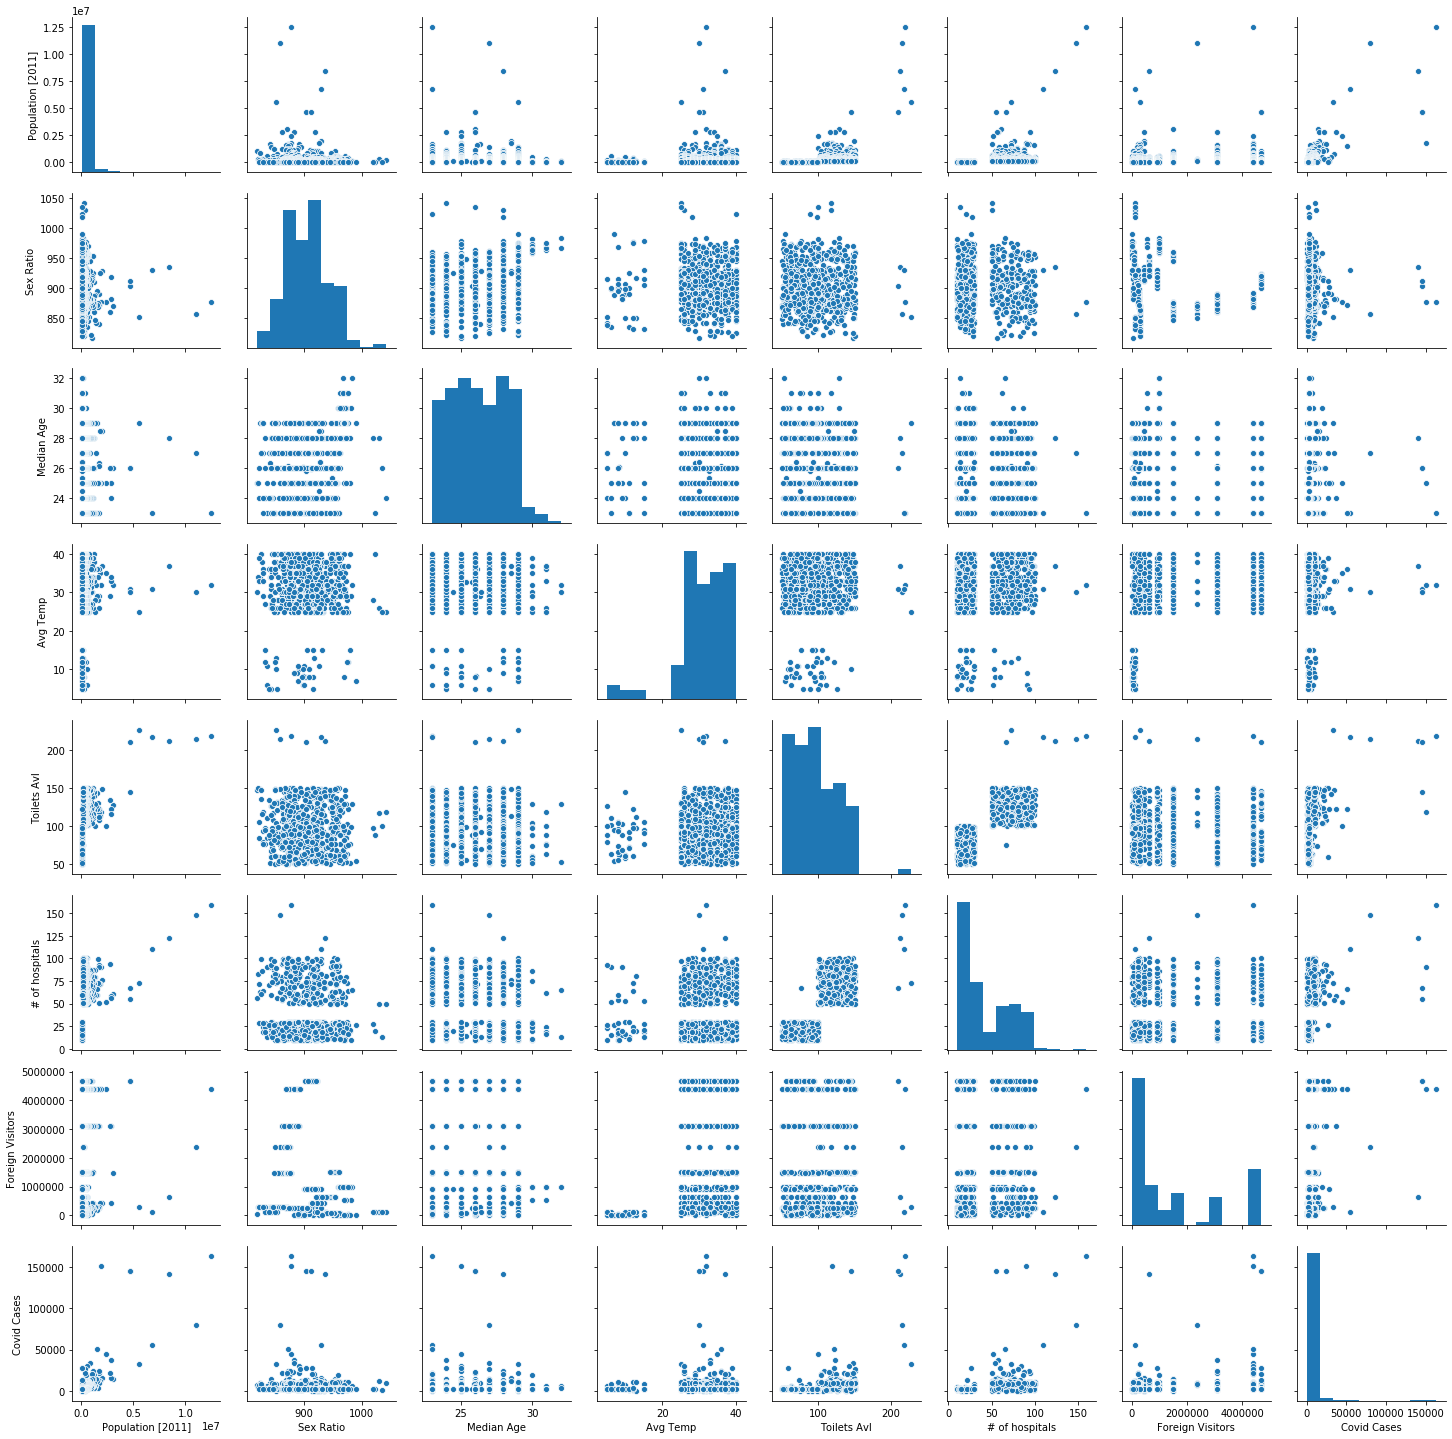

In [35]:
sns.pairplot(df)  #pairplot of the data

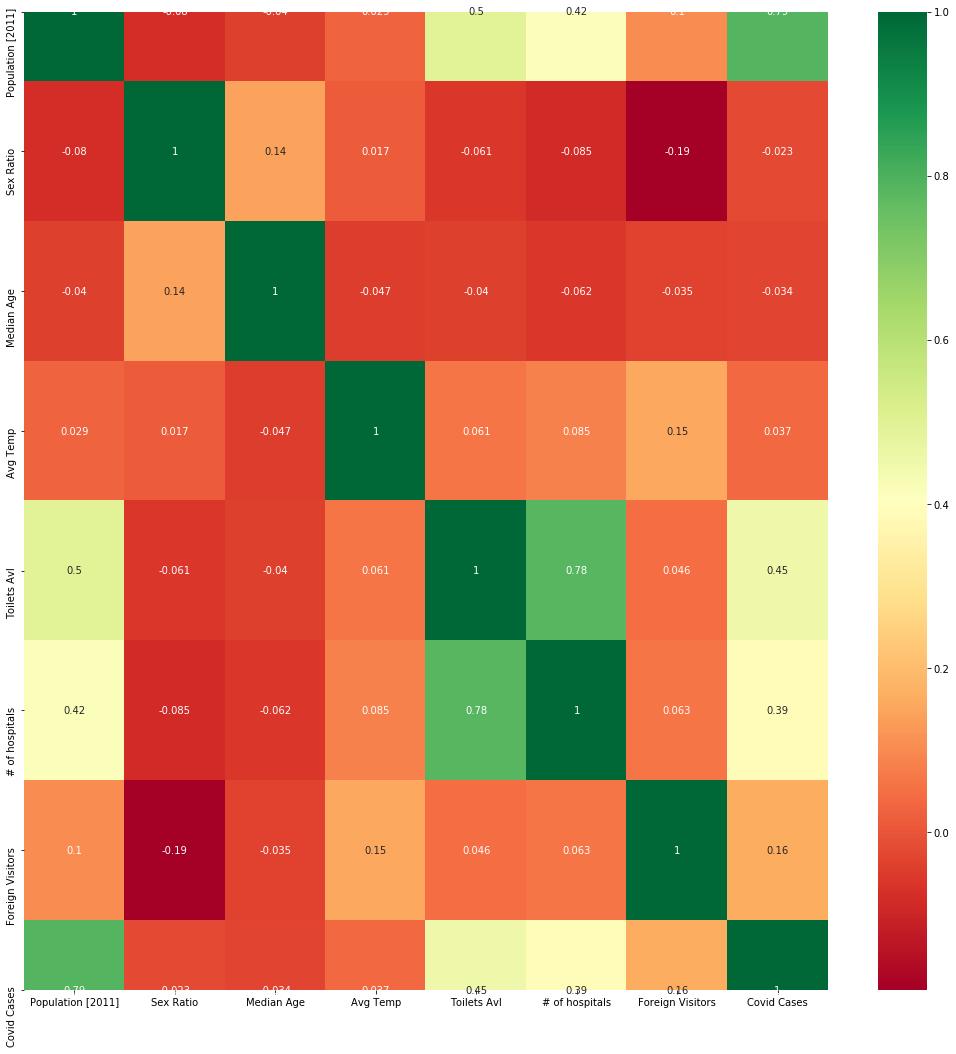

In [36]:
# Finds correlation between Independent and dependent attributes using heatmaps

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

 **Obsevation** 
- No of Hospitals  and toilets avl are highly corelated ,Need to drop  toilets avl coloum because generally those with more hospitals have less spread of virus

- Drop all the values less than 0.03

In [37]:
Col=['Sex Ratio', 'Toilets Avl' ,'State', 'Type', 'City']
df.drop(Col , axis=1, inplace=True)  # Drop of the coloums

In [38]:
df.describe(include='all')

,Population [2011],Median Age,Avg Temp,SWM,# of hospitals,Foreign Visitors,Covid Cases
count,7.280000e+02,728.000000,728.000000,728,728.000000,7.280000e+02,728.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,HIGH,NaN,NaN,NaN
freq,NaN,NaN,NaN,255,NaN,NaN,NaN
mean,2.930949e+05,26.162698,31.053818,NaN,42.281196,1.474434e+06,6308.168956
std,8.583145e+05,2.100591,6.804534,NaN,29.103019,1.642475e+06,13421.753111
min,3.677600e+04,23.000000,5.000000,NaN,10.000000,7.980000e+02,334.000000
25%,5.232300e+04,24.000000,28.000000,NaN,18.000000,2.378540e+05,2270.000000
50%,7.839550e+04,26.000000,32.000000,NaN,28.000000,6.365020e+05,2581.500000
75%,2.305810e+05,28.000000,36.000000,NaN,68.000000,3.104060e+06,8628.250000


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [39]:
# Convert object form into int using label encoding.
 

  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['SWM']= label_encoder.fit_transform(df['SWM']) 
  
df['SWM'].unique() 

array([2, 0, 1], dtype=int64)

In [40]:
df=df.astype(int) # Convert all the float values into int

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 786
Data columns (total 7 columns):
Population [2011]    728 non-null int32
Median Age           728 non-null int32
Avg Temp             728 non-null int32
SWM                  728 non-null int32
# of hospitals       728 non-null int32
Foreign Visitors     728 non-null int32
Covid Cases          728 non-null int32
dtypes: int32(7)
memory usage: 45.6 KB


#### **Outliers**


### Various ways of finding the outlier.
 - Using scatter plots
- Box plot
- using z score
- using the IQR interquantile rang

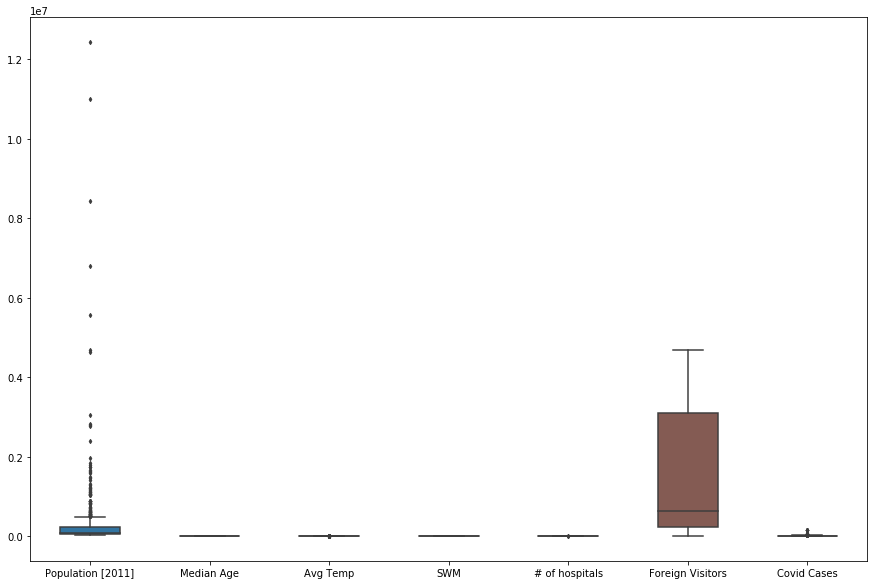

In [42]:
# Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Population [2011]     178258.00
Median Age                 4.00
Avg Temp                   8.00
SWM                        2.00
# of hospitals            50.00
Foreign Visitors     2866206.00
Covid Cases             6358.25
dtype: float64


In [44]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     Population [2011]  Median Age  Avg Temp    SWM  # of hospitals  \
0                False       False     False  False           False   
1                False       False     False  False           False   
2                False       False     False  False           False   
3                False       False     False  False           False   
4                False       False     False  False           False   
..                 ...         ...       ...    ...             ...   
782              False       False     False  False           False   
783              False       False     False  False           False   
784              False       False     False  False           False   
785              False       False      True  False           False   
786              False       False     False  False           False   

     Foreign Visitors  Covid Cases  
0               False        False  
1               False        False  
2               False        False  

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [45]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(600, 7)

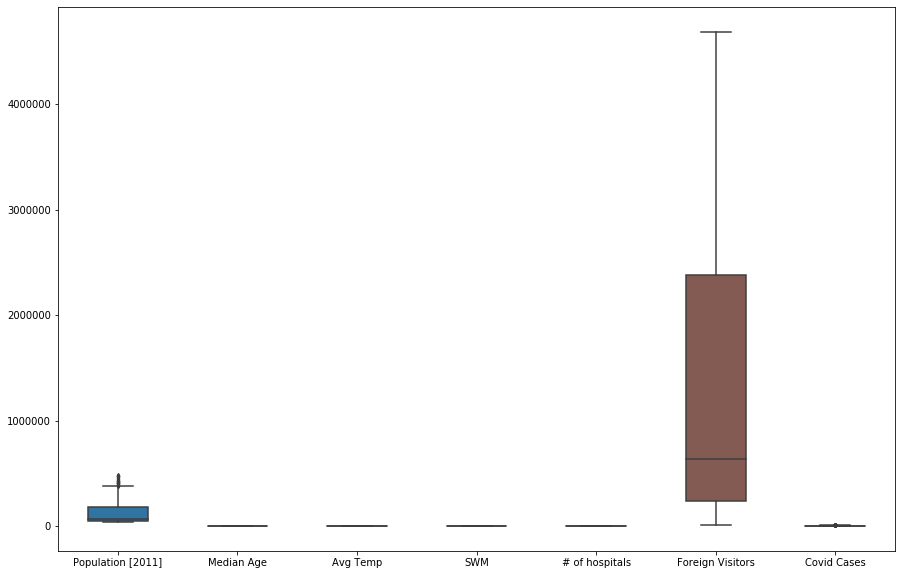

In [47]:
# Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_out, width= 0.5,ax=ax,  fliersize=3)

- Note:- Outliers are Removed

#### Test_Data pre processing

In [48]:
test_data=pd.read_excel('Test_dataset.xlsx')
test_data.isnull().sum()
test_data.shape
test_data.dropna(subset=['Type'],inplace=True) 
test_data.shape

co= [ 'Popuation [2001]', 'Water Purity' ,'H Index', 'Female Population', 'Sex Ratio', 'Toilets Avl']
test_data.drop(co , axis=1, inplace=True)  # Drop of the coloums


test_data['Type'].unique()  # Checking for unique values

test_data['Type'] =  test_data['Type'].replace(dic) # Replace all the those have dummy variables

test_data['State'].unique()  # Checking for unique values

test_data['State'].unique()  # Checking for unique values

# Fill nan values in mediaan age with average of particular state and type of city
test_data['Median Age'] = test_data.groupby(['State', "Type"])['Median Age'].transform(lambda x: x.fillna(x.mean()))



# Fill nan values in Avg temp with average of particular state and type of city
test_data['Avg Temp'] = test_data.groupby(['State', "Type"])['Avg Temp'].transform(lambda x: x.fillna(x.mean()))

# Fill nan values in # of Hospitals with average of particular state and type of city
test_data['# of hospitals'] = test_data.groupby(['State', "Type"])['# of hospitals'].transform(lambda x: x.fillna(x.mean()))

# Fill nan values in SWM with mode of particular state and type of city
test_data['SWM'] = test_data.groupby(['State', "Type"])['SWM'].transform(lambda x: x.fillna(x.mode()))

# Fill nan values in # of Hospitals with average of particular state and type of city
test_data['Foreign Visitors'] = test_data.groupby(['State', "Type"])['Foreign Visitors'].transform(lambda x: x.fillna(x.mean()))

test_data.isnull().sum()


# Now drop all the remaining Null values
test_data.dropna(inplace=True)

test_data.shape

C=[ 'State', 'Type', 'City']
test=test_data.drop(C , axis=1)  # Drop of the coloums

# Convert object form into int using label encoding
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
test['SWM']= label_encoder.fit_transform(test['SWM']) 
  
test['SWM'].unique() 

test=test.astype(int)

In [49]:
test.head()

,Population [2011],Median Age,Avg Temp,SWM,# of hospitals,Foreign Visitors
0,36774,23,10,2,17,2769
1,36754,25,38,0,13,636502
2,36732,29,35,0,17,242367
3,36706,26,31,0,11,4408916
4,36669,28,39,1,23,3104060


### **Model**

In [51]:
# Remove the regex 
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)


df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

In [52]:
# Divide the data into dependent and independent variable
X=df.iloc[:,:-1] # Independent variables
y=df.iloc[:,-1]

In [53]:
X.head()

,Population _2011_,Median Age,Avg Temp,SWM,# of hospitals,Foreign Visitors
0,12442373,23,32,2,159,4408916
1,11007835,27,30,2,148,2379169
2,8436675,28,37,0,123,636502
3,6809970,23,31,2,110,126078
4,5570585,29,25,1,73,284973


In [54]:
y.head()

0    163115
1     80188
2    141000
3     55123
4     33204
Name: Covid Cases, dtype: int32

## Fitting model using XGBoost

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in XG Boost
3. Import model
4. Fit the data
5. Predict w.r.t test
6. In regression check **RSME** Score
7. Plot graph

In [55]:
# Split the data into test data and train data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [56]:
# import xgboost regressor
import xgboost as xgb
regressor_xgb=xgb.XGBRegressor()
regressor_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
regressor_xgb.score(X_train, y_train) # score of train data

0.999991573502038

In [58]:
regressor_xgb.score(X_test, y_test) # Score of test data

0.7158211263467746

In [59]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor_xgb,X,y,cv=5)  # cross validation

In [60]:
prediction_xgb=regressor_xgb.predict(X_test)  # predication done using xgboost regressor

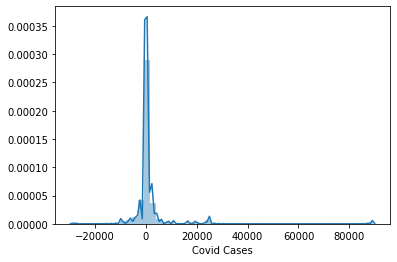

In [61]:
sns.distplot(y_test-prediction_xgb)  # Plot of the predication

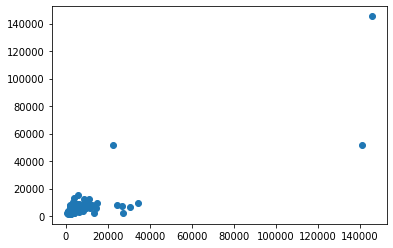

In [62]:
plt.scatter(y_test,prediction_xgb) # Scatter Plot

#### **Metrics**

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_xgb))
print('MSE:', metrics.mean_squared_error(y_test, prediction_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_xgb)))

MAE: 2368.137905246609
MSE: 66725715.86411581
RMSE: 8168.581019009104


In [64]:
metrics.r2_score(y_test, prediction_xgb) # Score

0.7158211263467746

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [66]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [67]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [68]:
# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [69]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor_xgb, param_distributions = random_grid_xgb,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [70]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                              

In [71]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 1200,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.3'}

In [72]:
predictions_xgb1=xg_random.predict(X_test)

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_xgb1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xgb1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb1)))

MAE: 2352.652829180707
MSE: 38657842.64296469
RMSE: 6217.543135593407


In [74]:
metrics.r2_score(y_test,predictions_xgb1 )

0.835359695465638

In [75]:
import pickle
# open a file, where you ant to store the data
file = open('covid_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)

In [76]:
model = open('covid_xgb.pkl','rb')
xgb = pickle.load(model)

In [77]:
xgb

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                              

In [78]:
xgb.best_params_

{'subsample': 0.6,
 'n_estimators': 1200,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.3'}

In [81]:
# Remove the regex 
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)


test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

In [82]:
prediction_xgb = xgb.predict(test)

In [83]:
prediction_xgb

array([2231.7637, 2359.8135, 2697.9036, 2293.1985, 2712.3506, 2547.605 ,
       2311.536 , 2699.0002, 2241.0037, 2293.568 , 2175.3145, 2042.7665,
       2501.3213, 2700.0706, 2092.1443, 2803.173 , 2430.802 , 2453.169 ,
       2235.7148, 2672.0154, 2500.846 , 2510.6997, 1968.9602, 2713.2493,
       2133.6194, 2593.7764, 2735.8965, 2360.206 , 2231.532 , 2717.0142,
       2187.3948, 2494.6626, 2206.4578, 2179.0374, 2608.0757, 2653.9346,
       2841.7324, 2206.7336, 2343.3354, 2128.225 , 2365.0786, 2108.129 ,
       2314.3699, 2359.1523, 2253.1484, 2138.1191, 2340.3662, 2378.5762,
       2372.423 , 2362.3687, 2376.136 , 2638.4626, 3326.7158, 2630.1162,
       2339.3699, 2161.966 , 2258.784 , 2320.5369, 2442.0698, 2423.0784,
       2356.306 , 2338.8127, 2137.6243, 2339.0227, 2934.1624, 2386.1216,
       2696.8403, 2179.7595, 2568.0461, 2075.5083, 2553.3098, 2677.0688,
       2111.952 , 2853.4941, 2472.2102, 2199.5994, 2514.4058, 2237.2192,
       2192.086 , 2710.2253, 2388.6123, 2444.5164, 

In [84]:
import numpy as np

In [85]:
prediction_xgb_final=np.array(prediction_xgb)

In [86]:
prediction_xgb_final.astype(int)

array([2231, 2359, 2697, 2293, 2712, 2547, 2311, 2699, 2241, 2293, 2175,
       2042, 2501, 2700, 2092, 2803, 2430, 2453, 2235, 2672, 2500, 2510,
       1968, 2713, 2133, 2593, 2735, 2360, 2231, 2717, 2187, 2494, 2206,
       2179, 2608, 2653, 2841, 2206, 2343, 2128, 2365, 2108, 2314, 2359,
       2253, 2138, 2340, 2378, 2372, 2362, 2376, 2638, 3326, 2630, 2339,
       2161, 2258, 2320, 2442, 2423, 2356, 2338, 2137, 2339, 2934, 2386,
       2696, 2179, 2568, 2075, 2553, 2677, 2111, 2853, 2472, 2199, 2514,
       2237, 2192, 2710, 2388, 2444, 2594, 2384, 2167, 2123, 2322, 2875,
       2481, 2735, 2683, 2857, 2220, 2388, 2572, 2870, 2580, 2974, 2390,
       2197, 2430, 2797, 2396, 2628, 2641, 2217, 2521, 2240, 2621, 2219,
       2614, 2671, 2238, 2669, 2541, 2057, 2292, 2420, 2503, 2371, 2405,
       2630, 2189, 2241, 2533, 2739, 2432, 2407, 2644, 2601, 2024, 2632,
       2575, 2815, 2777, 2799, 2415, 2460, 2561, 2719, 2138, 2414, 2650,
       2475, 2720, 2495, 2345, 2209, 2313, 2887, 23

In [91]:
my_submission = pd.DataFrame({'City': test_data.City, 'Covid Cases': prediction_xgb_final.astype(int)})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_final.csv', index=False)

In [92]:
a= pd.read_csv('submission_final.csv')

In [93]:
a.head()

,City,Covid Cases
0,Tuensang,2231
1,Lakshmeshwar,2359
2,Zira,2697
3,Yawal,2293
4,Thana Bhawan,2712
